# Convolutional Neural Network (CNN) for an object classification task using the CIFAR-10 dataset

# Task 1: Implementing a standard CNN

### a. Load the CIFAR-10 dataset, a brief explanation of the features and prepare the data for training (format, normalization).

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


Brief Explanation:  

CIFAR-10 is a dataset of 60,000 32x32 color images in 10 classes. Classes include things like airplanes, cars, birds, cats, etc. The dataset is structured into 50000 training images and 10000 test batch of size 32x32.  

CNNs train better when inputs are scaled to [0,1], hence we normalize the data to go from [0,255] to [0,1]
Also, One-hot encoding is done so the network can treat each class independently and can compute loss and gradients properly for multi-class classification.

In [3]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Preparing data using one hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### b. Based on the examination of the data, and CNN architectures discussed in class, propose a CNN architecture appropriate for an object detection task for CIFAR-10.

For CIFAR-10 (small 32x32 images), a simple CNN with 2–3 convolutional layers followed by dense layers is sufficient.

Proposed architecture:  
Conv2D (16 filters, 5 kernel, ReLU) → MaxPooling 2x2  
Conv2D (32 filters, 5 kernel, ReLU) → MaxPooling 2x2  
Conv2D (64 filters, 5 kernel, ReLU) → MaxPooling 2x2  
Flatten  
Dense (128 neurons, ReLU) → Dropout(0.5)  
Dense (10 neurons, softmax)  

Reasoning:

32x32 images are small → 3 conv layers are enough to extract features.  
Dropout prevents overfitting.  
Softmax output layer for multi-class classification.

### c. Define and fit the CNN to the dataset.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(input_shape=(32,32,3),
           kernel_size=5,
           filters = 16,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),

    MaxPooling2D((2,2)),

    Conv2D(kernel_size=5,
           filters = 32,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),

    MaxPooling2D((2,2)),

    Conv2D(kernel_size=5,
           filters = 64,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,802 (772.66 KB)

 Trainable params: 197,802 (772.66 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history = model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3192 - loss: 1.8324 - val_accuracy: 0.5527 - val_loss: 1.2347
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5498 - loss: 1.2637 - val_accuracy: 0.5949 - val_loss: 1.1258
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6197 - loss: 1.0797 - val_accuracy: 0.6566 - val_loss: 0.9861
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6648 - loss: 0.9670 - val_accuracy: 0.6641 - val_loss: 0.9514
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6920 - loss: 0.8802 - val_accuracy: 0.6752 - val_loss: 0.9585
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7179 - loss: 0.8083 - val_accuracy: 0.6918 - val_loss: 0.9103
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7333 - loss: 0.7610 - val_accuracy: 0.6875 - val_loss: 0.9242
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7550 - loss: 0.7045 -

### d. Plot the loss for training and validation and interpret the results.

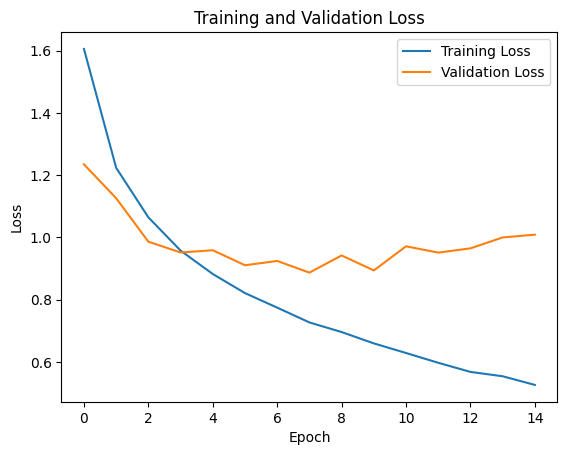

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


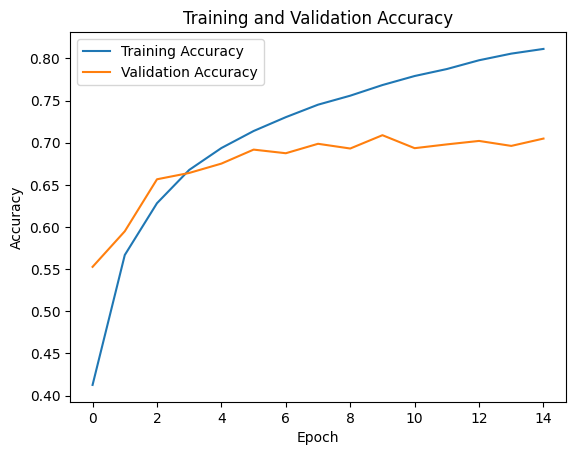

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

#### Interpretation:
The plot shows how the training and validation loss change across the 15 training epochs.

1. Training loss steadily decreases, accuracy Increases  
The training loss drops consistently from around 1.6 to about 0.5. This indicates that the model is successfully learning patterns in the training data and optimizing its weights, which can be interpreted with the increasing value of accuracy.

2. Validation loss initially decreases, but then plateaus and slightly rises  
Validation loss falls from about 1.25 to around 0.89 in the early epochs.
After roughly epoch 9–10, validation loss stops decreasing and fluctuates within a narrow range.
From around epoch 12 onwards, it begins to slightly increase.

The model learns well initially (both losses decrease together, accuracy increases). After the mid-point of training, validation loss stops improving while training loss keeps going down. This pattern indicates the model is beginning to overfit, it is memorizing the training data, but not improving at generalizing to unseen data.

Overall, the model trains successfully, but mild overfitting appears after about epoch 9-10.

# Task 2: Experiment with architecture and parameters

### a. Make changes to the number of convolutional layers (e.g., doubling them) and interpret the effect.
Using 5 convolutional layers

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_layer5 = Sequential([
    Conv2D(input_shape=(32,32,3),
           kernel_size=5,
           filters = 16,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),

    MaxPooling2D((2,2)),

    Conv2D(kernel_size=5,
           filters = 32,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),
    MaxPooling2D((2,2)),

    Conv2D(kernel_size=5,
           filters = 64,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),
    MaxPooling2D((2,2)),

    Conv2D(kernel_size=5,
           filters = 128,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),
    MaxPooling2D((2,2)),

    Conv2D(kernel_size=5,
           filters = 256,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [11]:
model_layer5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,123,882 (4.29 MB)

 Trainable params: 1,123,882 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model_layer5.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history_layer5 = model_layer5.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 82ms/step - accuracy: 0.3939 - loss: 1.6400 - val_accuracy: 0.5448 - val_loss: 1.2638
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.5720 - loss: 1.2146 - val_accuracy: 0.6211 - val_loss: 1.0811
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 884s 557ms/step - accuracy: 0.6389 - loss: 1.0399 - val_accuracy: 0.6400 - val_loss: 1.0298
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.6853 - loss: 0.9227 - val_accuracy: 0.6701 - val_loss: 0.9510
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.7192 - loss: 0.8210 - val_accuracy: 0.6732 - val_loss: 0.9653
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 85ms/step - accuracy: 0.7439 - loss: 0.7445 - val_accuracy: 0.6718 - val_loss: 0.9707
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.7701 - loss: 0.6715 - val_accuracy: 0.6895 - val_loss: 1.0189
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 191s 87ms/step - accuracy

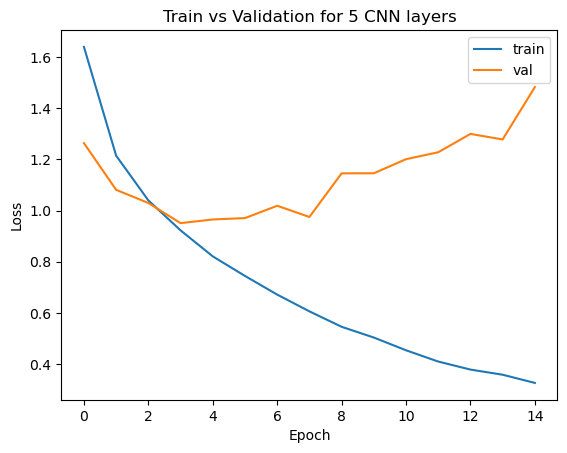

In [ ]:
plt.plot(history_layer5.history['loss'])
plt.plot(history_layer5.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Train vs Validation for 5 CNN layers")
plt.legend(['train','val'])
plt.show()

#### Interpretation

Increasing the number of convolutional layers allows the network to extract more complex, hierarchical features.

Training loss decreased faster and reached a lower value than the shallower network.

Validation loss initially improved but then rises sharply, indicating overfitting. More layers mean more parameters which is easier to overfit.

Deeper networks provide stronger representational power but require regularisation and more computation for complexity.

### b. Change the size of the kernel and explain the results.

In [ ]:
# Using 8 x 8 kernels
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_k8 = Sequential([
    Conv2D(input_shape=(32,32,3),
           kernel_size=8,
           filters = 16,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),

    MaxPooling2D((2,2)),

    Conv2D(kernel_size=8,
           filters = 32,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),

    MaxPooling2D((2,2)),

    Conv2D(kernel_size=8,
           filters = 64,
           activation='relu',
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_k8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_k8 = model_k8.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.3853 - loss: 1.6846 - val_accuracy: 0.4796 - val_loss: 1.4521
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 59ms/step - accuracy: 0.5142 - loss: 1.3646 - val_accuracy: 0.5552 - val_loss: 1.2528
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.5749 - loss: 1.2049 - val_accuracy: 0.6006 - val_loss: 1.1375
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 55ms/step - accuracy: 0.6172 - loss: 1.0948 - val_accuracy: 0.6195 - val_loss: 1.0842
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.6510 - loss: 0.9972 - val_accuracy: 0.6382 - val_loss: 1.0596
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6765 - loss: 0.9184 - val_accuracy: 0.6288 - val_loss: 1.0835
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7003 - loss: 0.8547 - val_accuracy: 0.6424 - val_loss: 1.0561
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 60ms/step - accuracy: 0.7175 

#### Interpretation

Larger kernels capture broader spatial relationships but dramatically increase the number of trainable parameters.

The model was slower to train and displayed a slightly higher validation loss due to increased complexity.

Smaller kernels are generally preferred because they extract fine detail and stack effectively.

### c. Choose two suitable alternative values for learning rate, modify the model and interpret the impact of each one.

In [ ]:
opt_high = tf.keras.optimizers.Adam(learning_rate=0.01)
opt_low  = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
# High learning rate
model.compile(
    optimizer=opt_high,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_opt_high = model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.2992 - loss: 1.9222 - val_accuracy: 0.3068 - val_loss: 1.8448
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.3170 - loss: 1.8628 - val_accuracy: 0.1898 - val_loss: 2.1533
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.3025 - loss: 1.8876 - val_accuracy: 0.2941 - val_loss: 1.8610
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.3072 - loss: 1.8760 - val_accuracy: 0.3557 - val_loss: 1.7357
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.1727 - loss: 2.1587 - val_accuracy: 0.1000 - val_loss: 2.3036
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.0998 - loss: 2.3038 - val_accuracy: 0.1001 - val_loss: 2.3033
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.0991 - loss: 2.3043 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.0980 -

In [ ]:
# Low learning rate
model.compile(
    optimizer=opt_low,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_opt_low = model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - accuracy: 0.1000 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 30ms/step - accuracy: 0.1000 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.1000 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.1000 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.1000 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.1000 -

#### Interpretation

High learning rate(0.01): Updates are too large, causing unstable training and poor accuracy because the model overshoots good solutions.

Low learning rate(0.0001): Updates are very small, making training slow and possibly underfitting unless many epochs are used.

Default learning rate: Balanced updates, giving stable training and good accuracy—typically.

Learning rate has one of the strongest effects on training stability and speed.

### d. Demonstrate visually and explain what happens if you choose an alternative activation function (ReLU, Tanh).

In [ ]:
activation = 'tanh'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_tanh = Sequential([
    Conv2D(input_shape=(32,32,3),
           kernel_size=5,
           filters = 16,
           activation=activation,
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),

    MaxPooling2D((2,2)),

    Conv2D(kernel_size=5,
           filters = 32,
           activation=activation,
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),

    MaxPooling2D((2,2)),

    Conv2D(kernel_size=5,
           filters = 64,
           activation=activation,
           padding='same',
           kernel_initializer=tf.keras.initializers.VarianceScaling()),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation=activation),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_tanh.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_tanh = model_tanh.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 71ms/step - accuracy: 0.4884 - loss: 1.4329 - val_accuracy: 0.5772 - val_loss: 1.2003
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 66ms/step - accuracy: 0.6061 - loss: 1.1255 - val_accuracy: 0.6513 - val_loss: 1.0057
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.6488 - loss: 1.0103 - val_accuracy: 0.6603 - val_loss: 0.9797
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 70ms/step - accuracy: 0.6787 - loss: 0.9271 - val_accuracy: 0.6679 - val_loss: 0.9529
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 73ms/step - accuracy: 0.6990 - loss: 0.8711 - val_accuracy: 0.6792 - val_loss: 0.9319
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.7181 - loss: 0.8166 - val_accuracy: 0.6916 - val_loss: 0.9048
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.7309 - loss: 0.7754 - val_accuracy: 0.6953 - val_loss: 0.9008
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 42ms/step - accuracy: 0

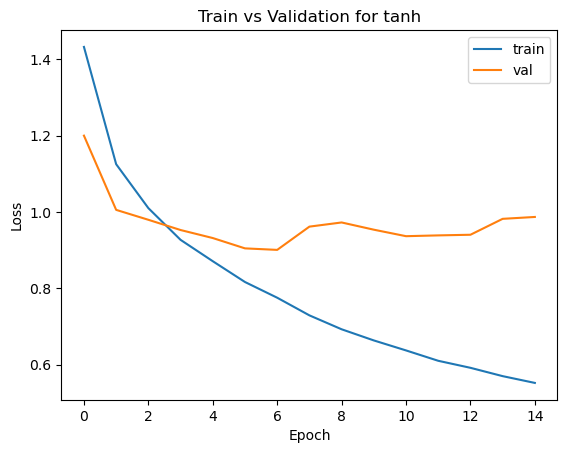

In [ ]:
plt.plot(history_tanh.history['loss'])
plt.plot(history_tanh.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Train vs Validation for tanh")
plt.legend(['train','val'])
plt.show()

#### Interpretation

ReLU: Simple and fast. Helps models train quickly and avoids vanishing gradients.

Tanh: Outputs are centered but gradients can vanish, making training slower. Can learn smoother representations but usually performs worse than ReLU in deep CNNs.

In short: ReLU = faster, stronger training, Tanh = slower, more risk of vanishing gradients.
ReLU remains the best choice for modern CNNs due to its robustness against vanishing gradients.

#### Visual demonstration - plot a graph ReLU vs Tanh

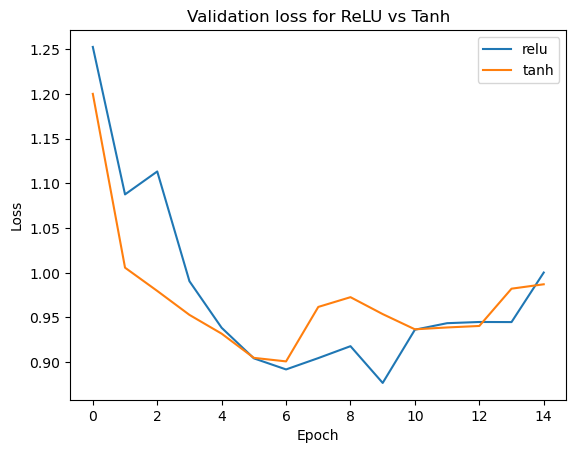

In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss - ReLU')
# plt.plot(history_tanh.history['loss'])
plt.plot(history_tanh.history['val_loss'], label='Validation Loss - tanh')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Validation loss for ReLU vs Tanh")
plt.legend(['relu','tanh'])
plt.show()

### e. What happens if you use an alternative Optimiser?

As an alternative optimizer, Stocastic Gradient Descent(SGD) is being used here to compare with the Adam optimizer. SGD updates model parameters based on the gradient of the loss function

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history_sgd = model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.0971 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.0963 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.0969 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.0980 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.0975 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.0994 -

#### Interpretation

Accuracy stays around 0.09 and validation accuracy stays at 0.10 for all epochs. Loss remains stuck around 2.30, which is the value expected when the model is predicting randomly. Hence, it can be said that no learning is happening — the model is essentially guessing.

Adam: Adapts the learning rate for each parameter, leading to faster and smoother convergence. Works well out of the box and trains CIFAR-10 models quickly.

SGD: Uses a fixed learning rate. Slower to converge.

In short: Adam = faster and easier, SGD = slower but can outperform with tuning.

### f. What impact does batch size make e.g., try batch size of 4, 32 and 256?

In [12]:
history_b4   = model.fit(x_train, y_train, batch_size=4,   epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.6343 - loss: 1.0838 - val_accuracy: 0.6268 - val_loss: 1.1115
Epoch 2/15
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.6658 - loss: 0.9826 - val_accuracy: 0.6423 - val_loss: 1.0746
Epoch 3/15
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.6613 - loss: 0.9958 - val_accuracy: 0.6294 - val_loss: 1.1328
Epoch 4/15
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.6657 - loss: 0.9884 - val_accuracy: 0.6435 - val_loss: 1.0655
Epoch 5/15
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.6671 - loss: 0.9812 - val_accuracy: 0.6432 - val_loss: 1.1035
Epoch 6/15
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.6641 - loss: 0.9938 - val_accuracy: 0.6223 - val_loss: 1.1743
Epoch 7/15
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.6750 - loss: 0.9850 - val_accuracy: 0.6506 - val_loss: 1.0878
Epoch 8/15
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 

In [13]:
history_b32  = model.fit(x_train, y_train, batch_size=32,  epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7298 - loss: 0.8080 - val_accuracy: 0.6946 - val_loss: 1.0318
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7616 - loss: 0.6835 - val_accuracy: 0.7065 - val_loss: 1.0375
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7746 - loss: 0.6501 - val_accuracy: 0.7010 - val_loss: 1.0691
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7844 - loss: 0.6214 - val_accuracy: 0.7088 - val_loss: 1.1082
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7906 - loss: 0.6043 - val_accuracy: 0.7034 - val_loss: 1.1663
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7954 - loss: 0.5783 - val_accuracy: 0.6937 - val_loss: 1.2037
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8055 - loss: 0.5476 - val_accuracy: 0.7049 - val_loss: 1.2285
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8131 - loss: 0.5361 - 

In [14]:
history_b256 = model.fit(x_train, y_train, batch_size=256, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.8727 - loss: 0.3494 - val_accuracy: 0.7138 - val_loss: 1.5301
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8892 - loss: 0.2992 - val_accuracy: 0.7146 - val_loss: 1.5383
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8885 - loss: 0.2998 - val_accuracy: 0.7162 - val_loss: 1.5943
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8937 - loss: 0.2802 - val_accuracy: 0.7174 - val_loss: 1.5786
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8967 - loss: 0.2766 - val_accuracy: 0.7161 - val_loss: 1.6434
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8982 - loss: 0.2708 - val_accuracy: 0.7149 - val_loss: 1.6938
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9013 - loss: 0.2576 - val_accuracy: 0.7171 - val_loss: 1.7541
Epoch 8/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9056 - loss: 0.2493 - val_accu

#### Interpretation

Batch size 4: Very noisy updates. Training is slow and unstable but can sometimes generalize well. Loss fluctuates a lot.

Batch size 32: Balanced and commonly used. Training is stable, efficient, and usually gives good accuracy.

Batch size 256: Much smoother but less frequent updates. Training is fast per epoch but may converge to a poorer solution and sometimes generalize worse.

Hence, Small batch = noisy but good generalization, medium batch = best balance, large batch = fast but may reduce final accuracy.

Batch size affects both stability and the generalisation behaviour of the model.

### g. Visualise and explain the output of each convolutional layer for a sample test image, displaying each channel as a grayscale image.

In [48]:
from tensorflow.keras import layers, models
import numpy as np

model.save('cifar10_cnn.keras')
loaded_model = models.load_model('cifar10_cnn.keras')

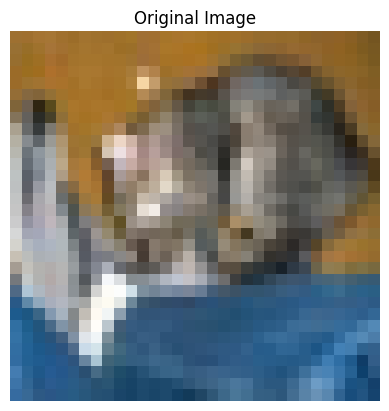

In [49]:
# Picking a sample test image
sample_image = x_test[0:1]  # shape (1,32,32,3)
plt.figure()
plt.title("Original Image")
plt.imshow(x_test[0])
plt.axis('off')
plt.show()

In [51]:
conv_layers = [layer for layer in loaded_model.layers if 'conv' in layer.name]
conv_layers

[<Conv2D name=conv2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>]

In [53]:
# Function to get activations for conv layers
def get_activations(model, conv_layers, x):
    activations = []
    out = x
    for layer in model.layers:
        out = layer(out)
        if layer in conv_layers:
            activations.append(out.numpy())
    return activations

# Get activations for the sample image
activations = get_activations(loaded_model, conv_layers, sample_image)

In [54]:
def plot_feature_maps(activation, layer_name):
    num_channels = activation.shape[-1]
    cols = 8
    rows = num_channels // cols + (1 if num_channels % cols != 0 else 0)
    plt.figure(figsize=(cols*1.5, rows*1.5))
    plt.suptitle(f'Feature maps of layer: {layer_name}', fontsize=16)
    for i in range(num_channels):
        plt.subplot(rows, cols, i+1)
        plt.imshow(activation[0,:,:,i], cmap='gray')
        plt.axis('off')
    plt.show()


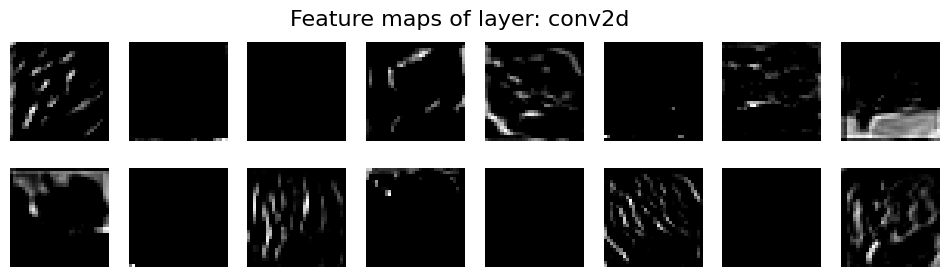

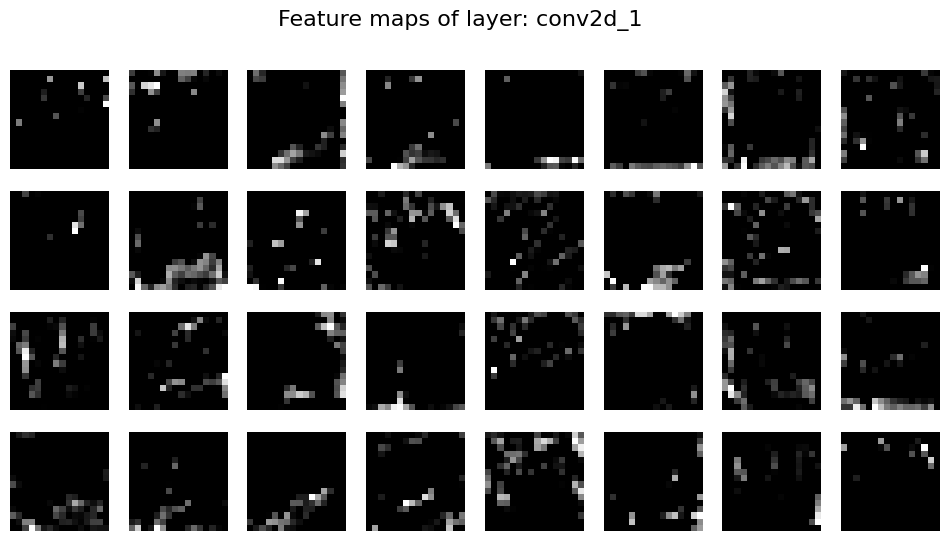

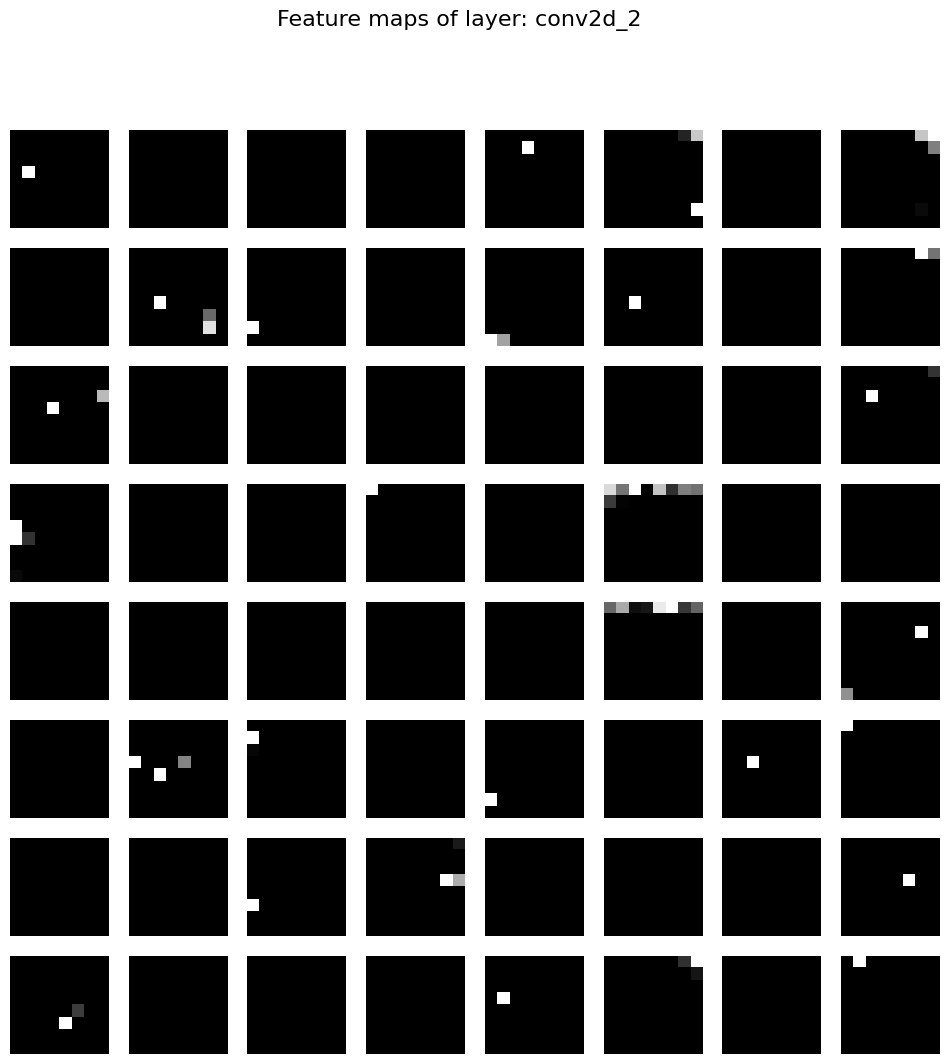

In [55]:
# Plot all conv layers activations
for layer, activation in zip(conv_layers, activations):
    plot_feature_maps(activation, layer.name)

#### Interpretation
Bright regions indicate strong activation. By looking at activations, we can understand what patterns the network considers important for classification.

- First Conv Layer

  Detects simple features like edges, corners, and color blobs.

  Feature maps are still close to the original image resolution.

- Second Conv Layer

  Detects more complex patterns such as textures, curves, or combinations of edges.

  Feature maps are smaller if pooling layers are used.

- Third Conv Layer

  Detects high-level abstract features, combinations of lower-level patterns.

  Feature maps may look less like the original image, but they highlight class-relevant patterns.

Each channel in a convolutional layer highlights different features. Displaying as grayscale shows intensity of activation for each feature.